# Teachable Machine Facemask Detector 


## Intro

This notebook is a Proof of Concept for a Facemask Detector. It detects whether a person wears a facemask or not. 

In this notebook we will use Google's Teachable Machine to train a Neural Network. 

Please visit https://teachablemachine.withgoogle.com/ and follow the instructions. 

Start a new project and select 'Image project'
Then create two classes: 'Mask' and 'No Mask'. 
You should at least take 100 pictures for each class. Make sure you have different backgrounds / lights etc. Preferably also different people, but this is not necessary.

After training the model you should download the two files: 
- keras_model.h5
- label.txt

After downloading this files, please upload them to your Jupyter Notebook environment (i.e. localhost).

Then use the scripts below to run the script.
Have fun!

## 0. Install the libraries

In [34]:
#Uncomment if necessary
#!pip install tensorflow
#!pip install python-opencv
#!pip install Pillow
#!pip install keras


ERROR: unknown command "tensorflow"



## 1. Take a picture with the webcam


In [43]:
# Take a picture
import cv2
video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")
# Read picture. ret === True on success
ret, frame = video_capture.read()

cv2.imshow('frame', frame)
# Close device
video_capture.release()

cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


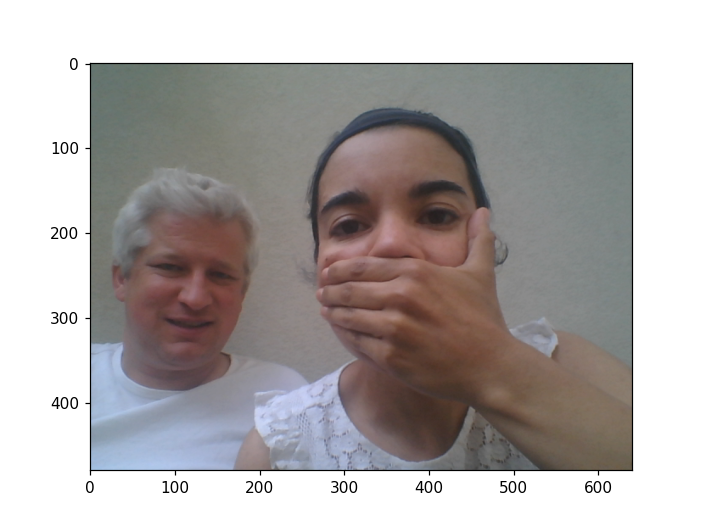

True

In [44]:
# show & save the picture
%matplotlib notebook
import sys
from matplotlib import pyplot as plt
frameRGB = frame[:,:,::-1] # BGR => RGB
plt.imshow(frameRGB)
cv2.imwrite('opencv_face.png', frameRGB)


## 2. Run the machine learning model

In [45]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('opencv_face.png')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.3897017  0.61029834]]


## 3. Turn the prediction into a human readable result

In [46]:
# turn the prediction into a human readable result: Mask vs No Mask
no_mask = ["No Mask", prediction[0,0]]
mask  = ["Mask", prediction[0,1]]

lijst = [no_mask, mask]
lijst.sort(key=lambda x: x[1], reverse=True)
print(lijst)
hoogste = lijst[0]
hoogste_class = hoogste[0]
hoogste_class

[['Mask', 0.61029834], ['No Mask', 0.3897017]]


'Mask'

In [32]:
if hoogste_class == "Mask":
    print("turn green led on")
elif hoogste_class == 'No Mask':
    print("turn red led on")

turn green led on
